# EDAN95 - Applied Machine Learning
### LTH Fall 2019

# Lab 2
### David Larsson & Jonas Lundgren

## Task 1

1)

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

Using code provided or the notebook `Python_introduction` from the first course week.

In [2]:
import matplotlib.pyplot as plt

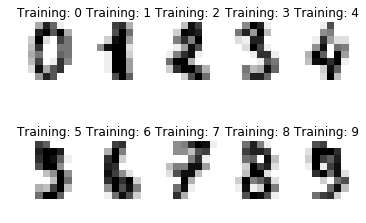

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

2)

In [4]:
num_data = len(digits.data)
num_data

1797

In [5]:
num_split = int(0.7*num_data)
num_split

1257

In [6]:
train_features = digits.data[:num_split]
train_labels = digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [7]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


3)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Using `graphviz` to visualize the tree.

In [10]:
import graphviz
from sklearn.tree import export_graphviz

Save a visualization of the tree as a pdf.

In [11]:
dot_data = export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("digits")

'digits.pdf'

Displaying the tree in the notebook.

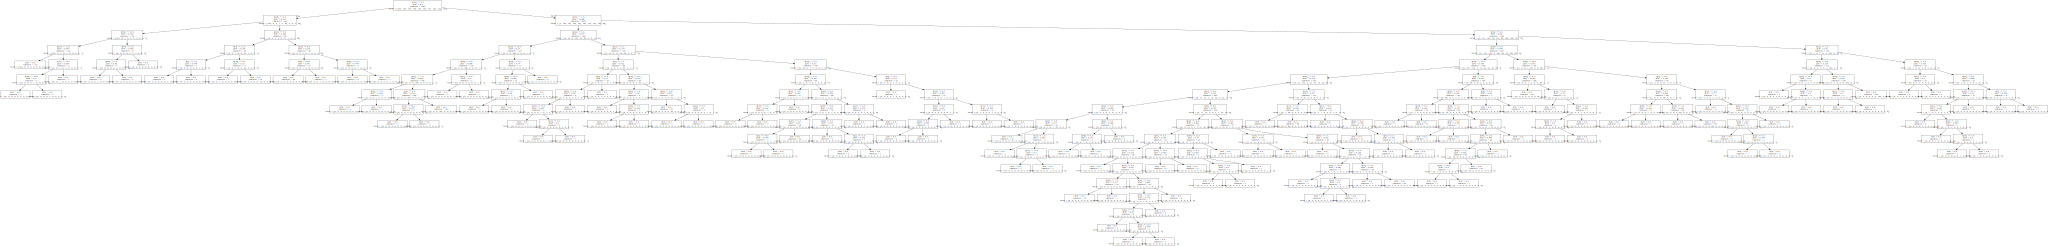

In [12]:
graph = graphviz.Source(dot_data)  
graph 

Easier to get an overview of the whole tree.

In [13]:
from sklearn.tree import plot_tree

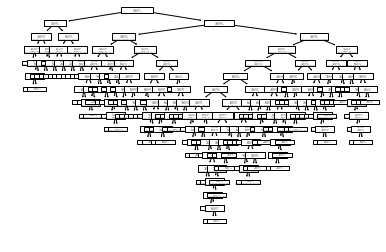

In [14]:
plot_tree(tree_clf);

We see that the tree is wide. We conclude that the algorithm splits the data att some pixel value for each pixel in each image. This results in many splits and thus a wide tree.

4)

In [15]:
predictions = tree_clf.predict(test_features)
predictions

array([4, 0, 5, 3, 6, 9, 6, 6, 7, 0, 4, 4, 7, 6, 8, 2, 2, 5, 7, 9, 5, 4,
       1, 8, 4, 9, 0, 8, 9, 8, 0, 3, 2, 3, 4, 5, 6, 4, 8, 5, 0, 1, 1, 3,
       0, 5, 6, 7, 8, 9, 0, 8, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       0, 9, 8, 9, 8, 0, 1, 7, 7, 3, 5, 1, 0, 0, 2, 9, 7, 8, 3, 0, 1, 3,
       6, 3, 3, 4, 3, 3, 0, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 2,
       1, 7, 5, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 6, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 6, 4, 7, 3, 8, 2, 2, 6, 9, 8, 5, 4, 8, 8,
       4, 4, 2, 8, 0, 1, 2, 3, 4, 5, 4, 7, 8, 9, 0, 3, 2, 3, 4, 5, 4, 7,
       7, 9, 0, 1, 2, 3, 4, 3, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 9, 3, 5, 1, 0, 0, 2, 2, 7, 9, 2, 0, 3, 2, 4, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 3, 5, 0, 9, 5, 2, 8, 2, 0, 0, 3, 7, 4, 3,
       2, 3, 7, 4, 6, 3, 1, 3, 9, 9, 7, 4, 8, 4, 3, 9, 4, 0, 5, 3, 6, 9,
       6, 9, 7, 5, 4, 4, 7, 2, 7, 2, 8, 5, 7, 9, 5, 4, 2, 9, 4, 0, 0, 5,
       9, 7, 0, 1, 2, 3, 4, 5, 4, 7, 1, 9, 2, 1, 2,

In [16]:
from sklearn import metrics

In [17]:
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.78      0.72      0.75        53
           2       0.76      0.74      0.75        53
           3       0.76      0.74      0.75        53
           4       0.78      0.88      0.83        57
           5       0.81      0.84      0.82        56
           6       0.81      0.81      0.81        54
           7       0.91      0.93      0.92        54
           8       0.76      0.62      0.68        52
           9       0.74      0.84      0.79        55

    accuracy                           0.80       540
   macro avg       0.80      0.80      0.80       540
weighted avg       0.80      0.80      0.80       540

Confusion Matrix: 
[[46  0  5  0  2  0  0  0  0  0]
 [ 0 38  2  6  0  0  1  0  3  3]
 [ 2  2 39  4  0  0  3  0  1  2]
 [ 0  1  1 39  0  3  0  1  4  4]
 [ 3  0  0  0 50  0  2  1  0  1]
 [ 2  0  1  2  1 47  3  0  0  0]


We see that the model has the highest score (precision, recall and f1) for predictin 7's. Lowest precision for 9's and lowest recall and f1 for 8's. In the confistion matrix we see that only 2 of the 7's are missclassified, 1 as a 4 and 1 as a 9. Comparing to the 8's that has many missclassifications. We also observe in the confusion matrix that many 9 predictions were made that were not 9's.

5)

Setting the `min_samples_split` = 10

In [18]:
tree_clf = DecisionTreeClassifier(min_samples_split = 10)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

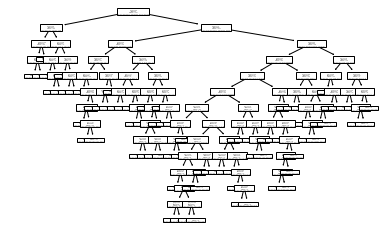

In [19]:
plot_tree(tree_clf);

In [20]:
predictions = tree_clf.predict(test_features)
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        53
           1       0.68      0.72      0.70        53
           2       0.66      0.74      0.70        53
           3       0.72      0.72      0.72        53
           4       0.81      0.77      0.79        57
           5       0.94      0.84      0.89        56
           6       0.84      0.80      0.82        54
           7       0.86      0.94      0.90        54
           8       0.72      0.50      0.59        52
           9       0.68      0.80      0.73        55

    accuracy                           0.77       540
   macro avg       0.77      0.77      0.77       540
weighted avg       0.77      0.77      0.77       540

Confusion Matrix: 
[[46  0  6  0  0  0  0  0  1  0]
 [ 0 38  3  0  1  0  1  1  0  9]
 [ 2  2 39  4  1  0  3  0  1  1]
 [ 0  1  1 38  0  3  0  1  5  4]
 [ 6  0  1  0 44  0  2  3  0  1]
 [ 2  0  1  2  2 47  2  0  0  0]


Much smaller tree. Decreased the weighted average of the precision, recall and f1-score of the tree slightly.

Setting the `min_samples_leaf` = 10

In [21]:
tree_clf = DecisionTreeClassifier(min_samples_leaf = 10)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

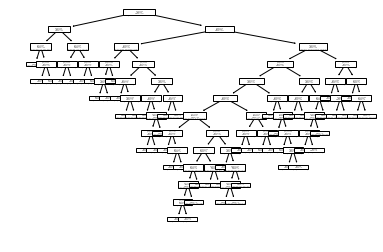

In [22]:
plot_tree(tree_clf);

In [23]:
predictions = tree_clf.predict(test_features)
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.65      0.68      0.67        53
           2       0.92      0.66      0.77        53
           3       0.64      0.66      0.65        53
           4       0.82      0.82      0.82        57
           5       0.80      0.88      0.84        56
           6       0.80      0.76      0.78        54
           7       0.85      0.81      0.83        54
           8       0.60      0.52      0.56        52
           9       0.66      0.85      0.75        55

    accuracy                           0.76       540
   macro avg       0.77      0.76      0.76       540
weighted avg       0.77      0.76      0.76       540

Confusion Matrix: 
[[51  0  0  0  1  0  0  0  1  0]
 [ 0 36  0  1  0  0  3  1  0 12]
 [ 1  1 35  5  2  5  0  1  3  0]
 [ 0  3  1 35  0  3  0  1  5  5]
 [ 0  0  0  0 47  3  2  2  1  2]
 [ 0  1  0  2  0 49  4  0  0  0]


Much smaller tree here aswell. Decreased the weighted average of the precision, recall and f1-score of the tree slightly compared to the non restricted treee.

Setting the `max_leaf_nodes` = 11

In [24]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes = 10)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

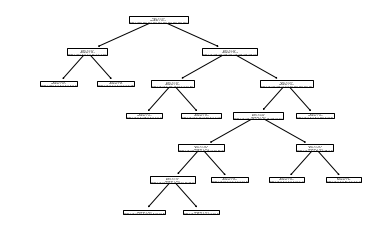

In [25]:
plot_tree(tree_clf);

In [26]:
predictions = tree_clf.predict(test_features)
print("Classification Report: ")
print(metrics.classification_report(test_labels, predictions))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        53
           1       0.68      0.51      0.58        53
           2       0.81      0.57      0.67        53
           3       0.77      0.64      0.70        53
           4       0.86      0.77      0.81        57
           5       0.00      0.00      0.00        56
           6       0.78      0.70      0.74        54
           7       0.86      0.80      0.83        54
           8       0.31      0.54      0.39        52
           9       0.40      0.85      0.55        55

    accuracy                           0.63       540
   macro avg       0.63      0.63      0.62       540
weighted avg       0.63      0.63      0.61       540

Confusion Matrix: 
[[51  0  0  0  1  0  0  0  1  0]
 [ 0 27  0  2  0  0  0  1  9 14]
 [ 2  0 30  6  0  0  4  1 10  0]
 [ 0  1  0 34  0  0  2  0 11  5]
 [ 3  0  0  0 44  0  2  2  6  0]
 [ 3  1  0  0  0  0  0  0 14 38]


/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Tree now only has 10 leaves resulting in a model only able to output either 0,1,2,...,9. Intrestingly the algoritm is not able to make a leaf to predict 6's.

## Task 2

1) - 5)

Code from the handout and https://github.com/tofti/python-id3-trees.

In [27]:
from collections import Counter
from graphviz import Digraph
import math

In [28]:
class ID3DecisionTreeClassifier :
    def __init__(self, minSamplesLeaf = 1, minSamplesSplit = 2, inequality = False) :
        
        self.attr_index = {}
        self.__nodeCounter = 0
        self.inequality = inequality
        # the graph to visualise the tree
        self.__dot = Digraph(comment='The Decision Tree')

        # suggested attributes of the classifier to handle training parameters
        self.__minSamplesLeaf = minSamplesLeaf
        self.__minSamplesSplit = minSamplesSplit


    # Create a new node in the tree with the suggested attributes for the visualisation.
    # It can later be added to the graph with the respective function
    def new_ID3_node(self):
        node = {'id': self.__nodeCounter, 'label': None, 'attribute': None, 'entropy': None, 'samples': None,
                         'classCounts': None, 'nodes': None}

        self.__nodeCounter += 1
        return node

    # adds the node into the graph for visualisation (creates a dot-node)
    def add_node_to_graph(self, node, parentid=-1):
        nodeString = ''
        for k in node:
            if ((node[k] != None) and (k != 'nodes')):
                nodeString += "\n" + str(k) + ": " + str(node[k])

        self.__dot.node(str(node['id']), label=nodeString)
        if (parentid != -1):
            self.__dot.edge(str(parentid), str(node['id']))

    # make the visualisation available
    def make_dot_data(self) :
        return self.__dot

    # For you to fill in; Suggested function to find the best attribute to split with, given the set of
    # remaining attributes, the currently evaluated data and target.
    def find_split_attr(self, data,target,attributes,classes):
        max_info_gain = None
        for attr in attributes:
            remaining_attr = self.removekey(attributes,attr)
            i_gain, ent = self.info_gain(attr, data,target,attributes,classes)
            if max_info_gain is None or i_gain > max_info_gain:
                max_info_gain = i_gain
                max_info_gain_attr = attr
                
        return max_info_gain_attr, ent
    
    # removes key
    def removekey(self, d, key):
        r = dict(d)
        del r[key]
        return r
    
    def entropy_split(self,data,target,col,val):
        cnt = Counter()
        
        for i in range(len(data)):
            if self.inequality:
                if data[i][col] in val:
                    cnt[target[i]] += 1
            else:
                if data[i][col] == val:
                    cnt[target[i]] += 1
            
        n_v = len(list(cnt.elements()))
        ent_v = 0
        if n_v > 0:
            for cl in classes:
                p_x = cnt[cl]/n_v
                if p_x != 0:
                    ent_v += -p_x*math.log(p_x,2)
        return ent_v, n_v
    
    def info_gain(self,split, data,target,attributes,classes):
        # Calculate the entropy first
        entropy = 0
        cnt = Counter(target)
        n = len(target)
        
        for cl in classes:
            p_x = cnt[cl]/n
            if p_x != 0:
                entropy += - p_x * math.log(p_x,2)
        
        col = self.attr_index[split]
        info_gain = entropy
        for val in attributes[split]:
            ent_v, n_v = self.entropy_split(data,target, col, val)
            info_gain += - n_v/n*ent_v
            
        return info_gain, entropy
            
                
    # Use this function split the data acording to the split attribute
    # Return values are dicts with value of split attribute as keys and the data/targets as items.
    def find_data_split(self,data,target,attributes,classes,split):
        data_split = {}
        target_split = {}
        col = self.attr_index[split]
        for vals in attributes[split]:
            data_split[str(vals)] = []
            target_split[str(vals)] = []
            for i in range(len(target)):
                if self.inequality:
                    if data[i][col] in vals:
                        data_split[str(vals)].append(data[i])
                        target_split[str(vals)].append(target[i])
                else:
                    if data[i][col] == vals:
                        data_split[str(vals)].append(data[i])
                        target_split[str(vals)].append(target[i])
                   
        return data_split, target_split
        

    # the entry point for the recursive ID3-algorithm, you need to fill in the calls to your recursive implementation
    def fit(self, data, target, attributes, classes, parent_id = -1):
        if self.__nodeCounter == 0:
            for attr in attributes:
                self.attr_index[attr] = list(attributes.keys()).index(attr)
                
        node = self.new_ID3_node()
#         self.add_node_to_graph(node)
        cnt = Counter(target)
        node['samples'] = len(target)
        node['classCounts'] = cnt
        if len(cnt) == 1:
            node['label'] = target[0]
            self.add_node_to_graph(node,parent_id)
            return node
        
        elif len(attributes) == 0:
            node['label'] = cnt.most_common(1)[0][0]
            self.add_node_to_graph(node, parent_id)
            return node
        else:
            split,ent = self.find_split_attr(data,target,attributes,classes)
            node['nodes'] = {}
            node['entropy'] = ent
            node['attribute'] = split
            fit_data, fit_target = self.find_data_split(data,target,attributes,classes,split)    
            for vals in attributes[split]:
                if len(fit_target[str(vals)]) == 0:
                    leaf_node = self.new_ID3_node()
                    leaf_node['label'] = cnt.most_common(1)[0][0]
                    leaf_node['samples'] = 0
                    self.add_node_to_graph(leaf_node,int(node['id']))
                    node['nodes'][str(vals)] = leaf_node
                else:
                    remaining_attr = self.removekey(attributes, split)
                    node['nodes'][str(vals)] = self.fit(fit_data[str(vals)],fit_target[str(vals)],remaining_attr,classes, int(node['id']))

        # fill in something more sensible here..  root should become the output of the recursive tree creation
        # root = self.new_ID3_node()
        # self.add_node_to_graph(root)
        self.add_node_to_graph(node, parent_id)
        return node
    

    def predict(self, data, tree) :
        predicted = list()
        
        def traverse(one_data, node):
            if node['label'] is not None:
                return node['label']
            elif node['nodes'] is not None:
                attr = node['attribute']
                val = one_data[self.attr_index[attr]]  
                if self.inequality:
                    for vals in node['nodes']:
                        if val in eval(vals):
                            return traverse(one_data, node['nodes'][vals])
                        
                else:
                     for vals in node['nodes']:
                        if val in vals:
                            return traverse(one_data, node['nodes'][vals])
                    #print(node['nodes'])
                    #return traverse(one_data, node['nodes'][val])
                
            
        for i in range(len(data)):
            predicted.append(traverse(data[i],tree))
            

        # fill in something more sensible here... root should become the output of the recursive tree creation
        return predicted

In [29]:
import DT_LabHandout.Handout_SkeletonDT.ToyData as td

In [30]:
attributes, classes, data, target, data2, target2 = td.ToyData().get_data()

In [31]:
id3 = ID3DecisionTreeClassifier()
myTree = id3.fit(data, target, attributes, classes)
plot = id3.make_dot_data()
plot.render("testTree")

'testTree.pdf'

In [32]:
predicted = id3.predict(data2, myTree)

In [33]:
print(predicted)
print(target2)

['+', '+', '+', '-', '-']
('+', '-', '+', '-', '+')


6)

In [34]:
train_features = digits.data[:num_split]
train_labels = digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [35]:
id3_2 = ID3DecisionTreeClassifier()

In [36]:
classes = [i for i in range(10)]
attributes = {}
for i in range(len(train_features[0])):
    attributes[i] = [j for j in range(17)] 

In [37]:
my2Tree = id3_2.fit(train_features, train_labels, attributes, classes)

In [38]:
plot = id3_2.make_dot_data()
plot.render("digitsTree")

'digitsTree.pdf'

In [39]:
train_features = train_features.astype(int).astype(str)
train_labels = train_labels.astype(int)

Training data.

In [40]:
training_preds = id3_2.predict(train_features, my2Tree)
print("Classification Report: ")
print(metrics.classification_report(train_labels, training_preds))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(train_labels, training_preds))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00       130
           4       1.00      1.00      1.00       124
           5       1.00      1.00      1.00       126
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       125

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257

Confusion Matrix: 
[[125   0   0   0   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0   0   0]
 [  0   0 124   0   0   0   0   0   0   0]
 [  0   0   0 130   0   0   0   0   0   0]
 [  0   0   0   0 124   0 

Test data.

In [41]:
test_features = test_features.astype(int).astype(str)
test_labels = test_labels.astype(int)

In [42]:
test_preds = id3_2.predict(test_features, my2Tree)
print("Classification Report: ")
print(metrics.classification_report(test_labels, test_preds))
print("Confusion Matrix: ")
print(metrics.confusion_matrix(test_labels, test_preds))

Classification Report: 
              precision    recall  f1-score   support

           0       0.48      0.57      0.52        53
           1       0.14      0.11      0.12        53
           2       0.50      0.64      0.56        53
           3       0.54      0.68      0.60        53
           4       0.47      0.44      0.45        57
           5       0.21      0.18      0.19        56
           6       0.45      0.46      0.46        54
           7       0.24      0.19      0.21        54
           8       0.25      0.25      0.25        52
           9       0.56      0.51      0.53        55

    accuracy                           0.40       540
   macro avg       0.38      0.40      0.39       540
weighted avg       0.38      0.40      0.39       540

Confusion Matrix: 
[[30  4  0  0  4  3  8  2  1  1]
 [ 1  6  9  4  3  6  5  3  9  7]
 [ 1  4 34  5  0  2  0  2  3  2]
 [ 1  2  3 36  1  2  0  3  5  0]
 [ 6  3  1  0 25  6  9  2  1  4]
 [10  3  2  6  7 10  3  6  7  2]
